#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo 13:**

* Rodrigo Rodriguez Rodriguez - A01183284
* Erick Nájera Olivero - A01793506
* Christian Saldaña López - A00506509
* Irvin Gomez Esquivel - A00361034   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pydotplus
from IPython.display import Image
import graphviz

#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI.

In [3]:
# Realizamos la lectura de los datos y cargamos la información en un DataFrame
df=pd.read_csv("SouthGermanCredit.asc",sep=" ")

#Realizamos la sustitución de los nombres de las columnas del conjunto de datos del idioma Alemán al Ingles,
# de acuerdo a lo deifindo en la pagina de la UCI.

df.rename(columns={"laufkont":"status", "laufzeit":"duration", "moral":"credit_history", "verw":"purpose", "hoehe":"amount",
                "sparkont":"savings", "beszeit":"employment_duration", "rate":"installment_rate",
                "famges":"personal_status_sex", "buerge":"other_debtors",
                "wohnzeit":"present_residence", "verm":"property",
                "alter":"age", "weitkred":"other_installment_plans",
                "wohn":"housing", "bishkred":"number_credits",
                "beruf":"job", "pers":"people_liable", "telef":"telephone", "gastarb":"foreign_worker",
                "kredit":"credit_risk"}, inplace=True)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [4]:
#Definimos la variable X a todas las variable el conjunto de entrada
#Definimos la variable Y a la variable de salida
X = df.iloc[:,:20]
Y = df.credit_risk
print(X.shape)
print(Y.shape)



(1000, 20)
(1000,)


In [5]:

#Se realiza la partición de los datos en conjunto de entrenamiento del 85%, prueba 15% 

X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.85, random_state=1)

print(X_train.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(X_val.shape, ': dimensión de datos de entrada para prueba')

print(y_train.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(y_val.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**

Se realiza una copia a un nuevo DF pero solo las columnas identificadas como numericas, con el proposito de analizarlas mas a detalle.

Obtenemos un histograma de estas para observar la distribución de los datos.

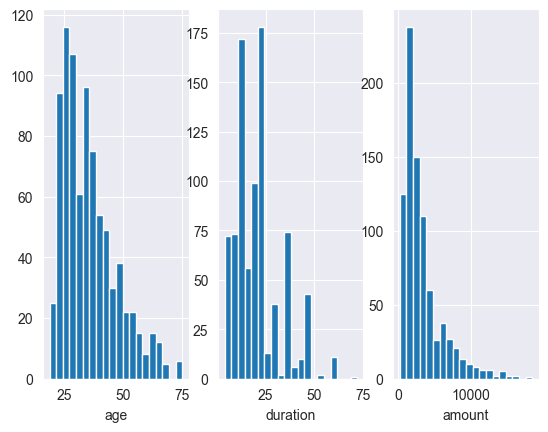

In [6]:


X_traind = pd.DataFrame(X_train, columns=['age','duration','amount'])
X_traind.head()

fig, axes = plt.subplots(1, 3)    # Definimos una ventana de 1x3 nichos para incluir en cada uno de ellos un gráfico.
for k in range(0,3):
  plt.subplot(1,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(X_traind[X_traind.columns[k]], bins=20)     # X_train.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(X_traind.columns[k])
plt.show()


In [7]:
X_traind.describe()

,age,duration,amount
count,850.000000,850.000000,850.000000
mean,35.696471,20.901176,3315.543529
std,11.339170,12.073279,2834.658875
min,19.000000,4.000000,250.000000
25%,27.000000,12.000000,1378.000000
50%,33.000000,18.000000,2356.000000
75%,42.000000,24.000000,3987.250000
max,75.000000,72.000000,18424.000000


* 3a. En los histogramas podemos observar que las variables numericas tiene un marcado sesgo positivo, por lo tanto procederemos a realizar imputación mediana a estos variables para buscar una distribución normal.

 Por otro lado aplicamos transformacion OneHotE a las variables categoricas ya que los modelos que vamos a utilizar son de claificación, donde la variable  Y a predecir es categorica, Se conoce el numero de columnas de este tipo y sabemos que no son todas ordinales.

* 3b. Al describir las columnas numericas podemos observar que en una misma variable hay diferencias entre valores numericos bastante grandes, lo que podria dificultar la implementación de un buen modelo ML. Por lo tanto usamos la normalizacion MinMAx para tener la informacion es una escala equiparable. 

* 3c. Tambien se utiliza la transfomración OneHotE a las variables binarias, ya que estas entran tambien en las categorias, si bien sus valores son 1 y 0, podemos encontrarnos con datos en un ambiente real que puedan ser Nulos o desconocidos, por o tanto es mejor tratarlos.

In [8]:
# Transformaciones a factores numéricos de entrada:Quantitativas
#Identificamos las columnas (amount, duration, age)

num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))]) 
num_pipeline_nombres = ['amount','duration','age'] 

#Identificamos las variables categorias y binarias y aplicamos transformación OneHotE
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first',handle_unknown='ignore'))])
catOHE_pipeline_nombres = [  'status', 'credit_history', 'purpose', 'savings', 'personal_status_sex','other_debtors','other_installment_plans', 'housing', 'telephone', 'foreign_worker', 'people_liable']



# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
cT= ColumnTransformer(transformers = [
    ('numpipe', num_pipeline, num_pipeline_nombres),('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],remainder='passthrough')

#**Ejercicio-4.**

Entrenamiento del modelo utilizando validación cruzada, este se realiza de manera conjunta para los modelos Regresión Logística, Árbol de decisión y Bosque Aleatorio.

In [9]:
#Creamos una función para llamar a los modelos a utilizar, estos seran almacenados en listas modelado y nombres
def get_model():
    modelado, nombres = list(), list()

  # LR - Regresión Logística:
    modelado.append(LogisticRegression(max_iter=3000))
    nombres.append('LR')

  # DT - Árbol de Decisión:
    modelado.append(DecisionTreeClassifier())
    nombres.append('DT')
  #Bosque Aleatorio
    modelado.append(RandomForestClassifier())
    nombres.append('BA')

    return modelado, nombres

modelos, nombres = get_model()
print(modelos)
print(nombres)

[LogisticRegression(max_iter=3000), DecisionTreeClassifier(), RandomForestClassifier()]
['LR', 'DT', 'BA']


Se definen las diferentes funciones que calcularan las metricas: accuracy, precision, recall, f1-score y Gmean.

In [10]:
#Se define una funcion para obtener la matriz de confusion que devuelva los valores vn,fp,fn,vp
def mi_confusion_matrix(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    tot = cm.sum()
    vn = 100*cm[0,0] / tot
    fp = 100*cm[0,1] / tot
    fn = 100*cm[1,0] / tot
    vp = 100*cm[1,1] / tot
    return vn, fp, fn, vp

In [11]:
#Funcion para calculo de la metrica Recall
def mi_recall(yreal, ypred):
    vn, fp, fn, vp = mi_confusion_matrix(yreal, ypred)
    recall = vp / (vp+fn)
    return recall

In [12]:
#Funcion para calculo de la metrica F1_score
def mi_fscore(yreal, ypred):
     vn, fp, fn, vp = mi_confusion_matrix(yreal, ypred)
     #fscore = (2 * vp) / ((2*vp) + fp + vn)
     #return fscore

     precision = vp/(vp+fp)
     recall = vp/(vp+fn)
     fscore = (2*precision*recall)/(precision+recall)
     return fscore

In [13]:
#Funcion para calculo de la metrica precision
def mi_precision(yreal, ypred):
     vn, fp, fn, vp = mi_confusion_matrix(yreal, ypred)
     precision = vp / (vp + fp)
     return precision
     

In [14]:
#Funcion para calculo de la metrica Accuracy
def mi_accuracy(yreal, ypred):
     vn, fp, fn, vp = mi_confusion_matrix(yreal, ypred)
     accuracy = (vp + vn) / (vp + fn + vn + fp)
     return accuracy
    

In [15]:
#Funcion para calculo de la metrica gmean
def mi_gmean(yreal,ypred):
    vn, fp, fn, vp = mi_confusion_matrix(yreal, ypred)
    recall = vp / (vp+fn)
    especificidad = vn / (vn+fp)
    gmean = np.sqrt(recall * especificidad)
    return gmean

In [16]:
#Se realiza el entrenamiento utilizando validación cruzada para los tres modelos
modelos, nombres = get_model()
resultados=list()
for i in range(len(modelos)):  # para realizar entrenamiento en forma conjunta
    pipeline = Pipeline(steps=[('CT',cT),('M',modelos[i])])
    Kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0) # VC estratificada 5 particiones, 3 repeticiones 

# se crea el diccionario con las metricas a utilizar
    Scores = {'accuracy':make_scorer(mi_accuracy), 'recall':make_scorer(mi_recall), 'gmean':make_scorer(mi_gmean),'f1':make_scorer(mi_fscore),'precision':make_scorer(mi_precision) }#Falta hacer nuestro propios metodos

# Se realiza lla validacion cruzada
    scoresSin = cross_validate(pipeline,
                          X_train, np.ravel(y_train),
                          scoring=Scores,
                          cv=Kfold,
                          return_train_score=True)
    resultados.append(scoresSin)

    print("Para los datos de test")
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nF1: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scoresSin['test_accuracy']),
                                                                          np.std(scoresSin['test_accuracy']),
                                                                          np.mean(scoresSin['test_recall']),
                                                                          np.std(scoresSin['test_recall']),
                                                                          np.mean(scoresSin['test_gmean']),
                                                                          np.std(scoresSin['test_gmean']),
                                                                          np.mean(scoresSin['test_precision']),
                                                                          np.std(scoresSin['test_precision']),
                                                                          np.mean(scoresSin['test_f1']),
                                                                          np.std(scoresSin['test_f1'])
                                                                          ))
    print("Para los datos de train")
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scoresSin['train_accuracy']),
                                                                          np.std(scoresSin['train_accuracy']),
                                                                          np.mean(scoresSin['train_recall']),
                                                                          np.std(scoresSin['train_recall']),
                                                                          np.mean(scoresSin['train_gmean']),
                                                                          np.std(scoresSin['train_gmean']),
                                                                          np.mean(scoresSin['train_precision']),
                                                                          np.std(scoresSin['train_precision']),
                                                                          np.mean(scoresSin['train_f1']),
                                                                          np.std(scoresSin['train_f1'])
                                                                          ),"\n\n")

Para los datos de test
LR:
mean Accuracy: 0.761 (0.0230)
mean Recall: 0.880 (0.0309)
Gmean: 0.654 (0.0379)
Precision: 0.798 (0.0179)
F1: 0.837 (0.0169)

Para los datos de train
LR:
mean Accuracy: 0.795 (0.0102)
mean Recall: 0.902 (0.0055)
mean Gmean: 0.704 (0.0178)
mean Precision: 0.821 (0.0090)
mean Fscore: 0.860 (0.0065)
 


Para los datos de test
DT:
mean Accuracy: 0.675 (0.0290)
mean Recall: 0.758 (0.0343)
Gmean: 0.604 (0.0447)
Precision: 0.772 (0.0271)
F1: 0.765 (0.0222)

Para los datos de train
DT:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 1.000 (0.0000)
 


Para los datos de test
BA:
mean Accuracy: 0.754 (0.0149)
mean Recall: 0.903 (0.0174)
Gmean: 0.609 (0.0326)
Precision: 0.779 (0.0137)
F1: 0.836 (0.0100)

Para los datos de train
BA:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 1.000 (0.0000)
 




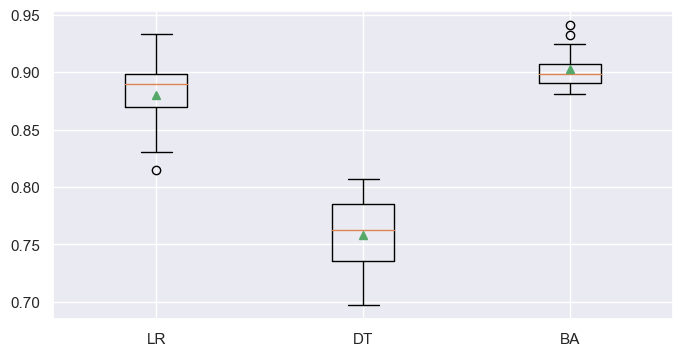

In [17]:
#Diagrama de cajas y bigotes para los 3 modelos con la metrica Recall
sns.set(rc={'figure.figsize':(8,4)})
bpGmean = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

* 4d. Analisis Gráfica de Cajas y Bigotes

En el análisis observado al grafico de cajas y bigotes encontramos que los tres modelos se encuentran compactos pero al observar que la mediana no tiene una distribución asimétrica, podemos concluir que los modelos están sesgados a la derecha, lo cual indica que los modelos pueden estar presentando sobre entrenamiento, observemos las curvas de aprendizaje de los modelos para concluir.



In [18]:
#Esta función grafica las curvas de aprendizaje
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,i):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')

    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    if(i<2):
       plt.ylabel('f1 score')
    if(i==2):
       plt.ylabel('recall')  
    if(i==4):
       plt.ylabel('precision')

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [19]:
#Esta función grafica las curvas de validación
def mi_ValidationCurvePlot(param_range, train_scores, val_scores,i):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')

    plt.plot(param_range, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(param_range, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

    plt.title('Curvas de validación incrementando la profundidad')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    if(i==5):
      plt.ylabel('f1 score')
    else:
      plt.ylabel('recall')  
    

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [20]:
def mi_grafica(modelos,Xin,y,i):
       modelo = modelos

       xcolumnas = cT.fit(Xin)
       Xtransform = xcolumnas.transform(Xin)

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)



       delta_train_sz = np.linspace(0.1, 1.0, num=20)


       if(i<2):
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = y,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_fscore),
                                                        random_state=0)
       if (i == 2):
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = y,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_recall),
                                                        random_state=0)
       if (i == 4):
            tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = y,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_precision),
                                                        random_state=0)
       if (i == 5):
            pr = np.arange(1, 20)    
            tr_scores, val_scores = validation_curve(estimator = modelo,    
                                                        X = Xtransform,
                                                        y = y,
                                                        cv = mi_kfold ,
                                                        param_name='max_depth',
                                                        param_range=pr,
                                                        scoring=make_scorer(mi_fscore))
       if (i == 6):   
            pr = np.arange(1, 10) 
            tr_scores, val_scores = validation_curve(estimator = modelo,    
                                                        X = Xtransform,
                                                        y = y,
                                                        cv = mi_kfold ,
                                                        param_name='max_depth',
                                                        param_range=pr,
                                                        scoring=make_scorer(mi_recall))
  

       # Obtenemos el gráfico con las curvas de aprendizaje o validacion segun el caso:
       if(i>=5):
          mi_ValidationCurvePlot(pr, tr_scores, val_scores,i)
       else:
          mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)        

In [21]:
modelos, nombres = get_model()
print(modelos)

[LogisticRegression(max_iter=3000), DecisionTreeClassifier(), RandomForestClassifier()]


Curva de aprendizaje para el modelo LR


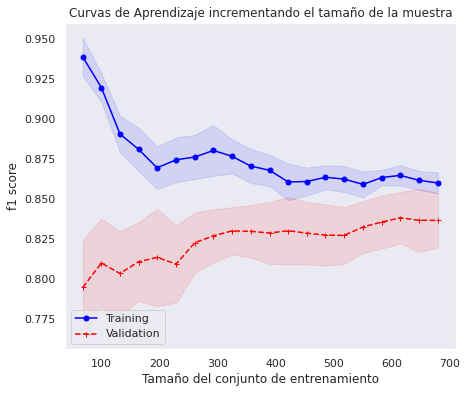

In [97]:
#Utilizando las funciones definidas para obtener las curvas de aprendizaje del modelo RL
cv= Kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)
print(f"Curva de aprendizaje para el modelo {nombres[0]}")
mi_grafica(modelos[0],X_train,y_train,0)

4. e.i. Conclusiones obtenidas de las gráficas de las curvas de aprendizaje Modelo RL.

Podemos observar que en el modelo de regresión logística se presenta sub-entrenamiento, esto debido a que podemos observar que la cuerva de aprendizaje para datos de entrenamiento tiende a decrementarse a mayor numero de muestras de los datos, en pocas palabras el modelo no está aprendiendo de estos datos. De igual forma la curva de aprendizaje con los datos de validación tiende a llevar el mismo comportamiento de que los datos test.






Curvas de validación Modelo DT con variacion en max_depth de 1 a 20


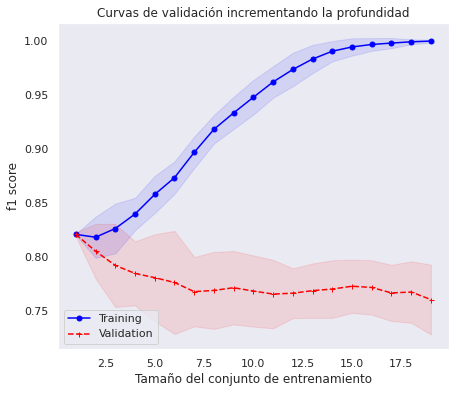

In [92]:
#Graficamos las curvas de aprendiaje para el modelo de Arbol de decision
#Incrementando en parametro max_depth hasta un total de 20
#for i in range(1,20):
print(f'Curvas de validación Modelo DT con variacion en max_depth de 1 a 20')
mi_grafica (modelos[1],X_train,y_train,5)


4 e.ii. Conclusiones obtenidas de las gráficas de las curvas de validación del Modelo Árbol de Decisión.

Podemos observar que el modelo árbol de decisión presenta un sobre-entrenamiento, esto debido al comportamiento de la curva de validación, se puede observar que en el entrenamiento esta tiende a alcanzar un puntaje perfecto en la métrica definida mientras que  la curva de los datos de validación  tiende a decrecer manteniendo una alta varianza, es decir, con los datos de validación está obteniendo un comportamiento totalmente diferente al puntaje perfecto alcanzado en el entrenamiento, indicador que con cualquier conjunto de datos reales no logrará alcanzar un mínimo porcentaje de éxito.



Curvas de aprendizaje Modelo BA


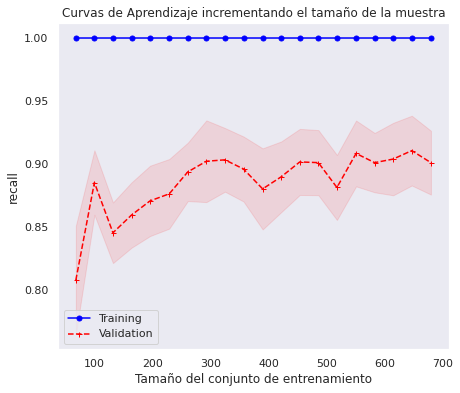

In [64]:
#Graficamos las curvas de aprendiaje para el modelo de Bosque Aleatorio
#Incrementando en parametro max_depth hasta un total de 20
#for i in range(1,20):
print(f'Curvas de aprendizaje Modelo BA')
mi_grafica (modelos[2],X_train,y_train,2)

4 e.iii. Conclusiones obtenidas de las gráficas de las curvas de validación del Modelo Bosque Aleatorio.

Para el modelo de Bosque aleatorio también podemos concluir que se encuentra sobre-entrenado en función de la métrica Recall, se puede observar que con los datos de entrenamiento mantiene un puntaje de 100%, mientras que los datos de validación apenas supera el 90% manteniendo una alta varianza entre estos. Un puntaje perfecto que se mantiene en los diferentes muestras de datos es indicador de que el modelo está aprendiendo inclusive de outliers, este sesgo  impide la generación de un modelo que pueda realizar la misma predicción con un nuevo conjunto de datos.



#**Ejercicio-5.**

In [98]:
#Función do_grid_search para realizar la busqueda de los mejores hiperparametros para cada uno de los modelos
def do_grid_search(model, X, y, cv, dicc_grid, scoring = 'accuracy'):
    
    grid_pipe = Pipeline(steps = [
        ('Correlation', cT),
        ('model', model)
        ])

    #Creamos el grid
    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv,
        param_grid=dicc_grid, scoring=scoring)

    
    grid.fit(X, y.values.ravel())

    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)

    return grid

In [99]:
#Diccionario con diferente valores de hiperparametros para el modelo RL
dicc_grid = {'model__C':np.linspace(70, 100, 10),
             'model__solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'model__class_weight':[None,'balanced'],
             'model__penalty':['l2']
             }

grid_LR = do_grid_search(modelos[0], X_train, y_train, Kfold, dicc_grid, make_scorer(mi_fscore))

Mejor valor de exactitud obtenido con la mejor combinación: 0.8347592570593106
Mejor combinación de valores encontrados de los hiperparámetros: {'model__C': 73.33333333333333, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Métrica utilizada: make_scorer(mi_fscore)


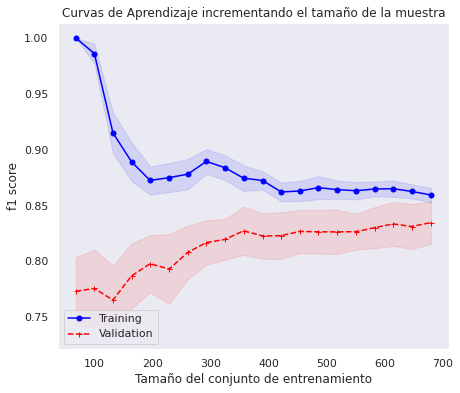

In [100]:
#Obtenemos la grafica de la curva de aprendizaje para el modelo RL con los mejores parametros
mi_grafica (LogisticRegression(max_iter=5000,C=73.33,solver='liblinear',penalty='l2'),X_train,y_train,1)


5.a ¿Cuál es la utilidad de la métrica f1-score?

La métrica f1-score se calcula a partir de la precisión y el recall. Básicamente ayuda a medir que tan acertado es un modelo, cuando el número tiende a 1, quiere decir que el modelo clasifica cada observación correctamente en la clase que le corresponde, mientras que un f1-score de 0 quiere decir que el modelo es incapaz de clasificar observaciones en las clases que le corresponden. 
En base a esto, podemos concluir que el mejor modelo de acuerdo a la métrica f1-score es: 0.83

In [101]:
#Diccionario con diferente valores de hiperparametros para el modelo DT
dicc_grid = {'model__ccp_alpha':np.linspace(0.0001, 100, 10),
             'model__criterion':['gini', 'entropy'],
             'model__max_depth':np.linspace(1, 1000, 10,dtype=int),
             'model__min_samples_split':np.linspace(0.000001, 1.0, 10),
             'model__class_weight':['balanced',None]
            }

grid_DT = do_grid_search(modelos[1], X_train, y_train, Kfold, dicc_grid, make_scorer(mi_precision))

Mejor valor de exactitud obtenido con la mejor combinación: 0.8865243051847155
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0.0001, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_split': 1e-06}
Métrica utilizada: make_scorer(mi_precision)


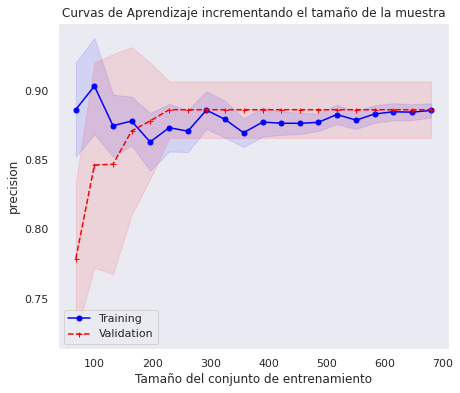

In [102]:
#Obtenemos la grafica de la curva de aprendizaje para el modelo DT con los mejores parametros
mi_grafica (DecisionTreeClassifier(ccp_alpha=0.0001,class_weight='balanced',criterion='gini',max_depth=1,min_samples_split=0.000001),X_train,y_train,4)


5.c ¿Cuál es la utilidad de la métrica precision?

La métrica precision se utiliza para cuantificar el número de predicciones positivas correctas. Básicamente calcula que tan acertado es el modelo para la clase minoritaria. Es una buena métrica de evaluación del modelo cuando el costo de un falso positivo es muy alto y el costo de un falso negativo es bajo. La precisión se refiere al porcentaje de resultados que son relevantes.
Podemos concluir que el mejor modelo de acuerdo a la métrica precision es: 0.88

In [103]:
#Diccionario con diferente valores de hiperparametros para el modelo BA
dicc_grid = {'model__ccp_alpha':np.linspace(0.00001, 1.0, 10),
             'model__criterion':['gini', 'entropy'],
             'model__max_depth':[12],
             'model__min_samples_split':[3],
             'model__class_weight':['balanced','balanced_subsample',None],
             'model__n_estimators': [100]
             }

grid_BA = do_grid_search(modelos[2], X_train, y_train, Kfold, dicc_grid, make_scorer(mi_recall))

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0.11112, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 12, 'model__min_samples_split': 3, 'model__n_estimators': 100}
Métrica utilizada: make_scorer(mi_recall)


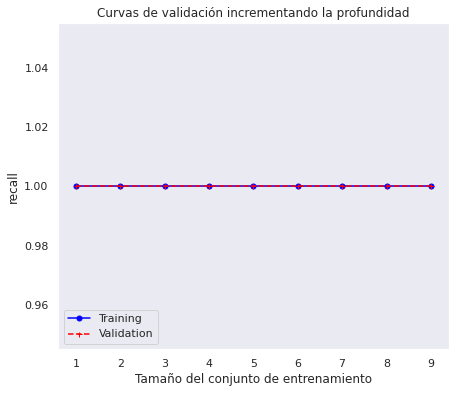

In [106]:
#Obtenemos la grafica de la curva de validacion para el modelo BA con los mejores parametros
mi_grafica (RandomForestClassifier(ccp_alpha=0.11112,criterion='gini',max_depth=12,min_samples_split=3,n_estimators=100),X_train,y_train,6)


 5.e ¿Cuál es la utilidad de la métrica recall?
 
La métrica recall se utiliza para cuantificar el número correcto de predicciones positivas de entre todas las predicciones que se pudieron haber hecho. En otras palabras recall se refiere al porcentaje total de resultados relevantes que fueron correctamente clasificados por el algoritmo. Recall le da particular importancia a reducir el número de falsos negativos, por lo tanto es una métrica muy valiosa para aplicaciones donde un falso negativo puede implicar grandes pérdidas humanas o materiales.
Podemos concluir que el mejor modelo de acuerdo a la métrica recall es: 1.0

#**Ejercicio-6.**

In [107]:
#Modelo Final RL
modelof_RL = LogisticRegression(max_iter=10000,
                            C=grid_LR.best_params_.get('model__C'),
                            solver=grid_LR.best_params_.get('model__solver'),
                            class_weight=grid_LR.best_params_.get('model__class_weight'),
                            penalty=grid_LR.best_params_.get('model__penalty'),
                            random_state=0)


XtrainFit = cT.fit(X_train)
XtrainTransf = XtrainFit.transform(X_train)
XvalTransf  =  XtrainFit.transform(X_val)
modelof_RL.fit(XtrainTransf, np.ravel(y_train))

print('Mejor valor de f1-score obtenido con la mejor combinación:', grid_LR.best_score_)
print("Mejor valor del modelo de Regresion Logistica:", modelof_RL.score(XvalTransf, np.ravel(y_val)))




Mejor valor de f1-score obtenido con la mejor combinación: 0.8347592570593106
Mejor valor del modelo de Regresion Logistica: 0.7133333333333334


6a. Conclusiones del modelo de Regresión Logística.

Con un valor de f1-score de 0.8347 y considerando que el mejor valor de Regresión Logística fue 0.7133, podemos concluir que utilizar Regresión Logística para este problema nos dice que sería un modelo confiable, con un f1-score que nos dice que tanto recall como precisión son buenas para hacer ele análisis crediticio, sin embargo, no parece ser el mejor modelo si lo comparamos con los otros 2.

In [108]:
#Modelo Final DT

modelof_DT = DecisionTreeClassifier(ccp_alpha=grid_DT.best_params_.get('model__ccp_alpha'),
                                    criterion=grid_DT.best_params_.get('model__criterion'),                               
                                    max_depth=grid_DT.best_params_.get('model__max_depth'),
                                    min_samples_split=grid_DT.best_params_.get('model__min_samples_split'),
                                    class_weight=grid_DT.best_params_.get('model__class_weight'),                                
                                    random_state = 0,
                                    max_features=20,
                                    max_leaf_nodes=20)

XtrainFit = cT.fit(X_train)
XtrainTransf = XtrainFit.transform(X_train)
XvalTransf  =  XtrainFit.transform(X_val)
modelof_DT.fit(XtrainTransf, np.ravel(y_train))

print('Mejor valor de Precisión obtenido con la mejor combinación:', grid_DT.best_score_)
print("Mejor valor del modelo de Arbol de Decisión:", modelof_DT.score(XvalTransf, np.ravel(y_val)))


Mejor valor de Precisión obtenido con la mejor combinación: 0.8865243051847155
Mejor valor del modelo de Arbol de Decisión: 0.4666666666666667


6b. Conclusiones del modelo de Árbol de Decisión.

Con un score de Precisión de 0.8665, pareciera que este es un modelo mejor que Regresión Logística, sin embargo, si consideramos que el mejor valor del modelo de Árbol de Decisión fue de 0.4666, podemos concluir que al utilizar este modelo, existe un riesgo alto de otorgarle un crédito a un mal cliente. Y no recomendamos usar Árbol de Decisión, aunque tenga una ventaja de rapidez de procesamiento sobre el Bosque Aleatorio. 

Las ventajas principales del Árbol de Decisión sobre el Bosque Aleatorio es que el Árbol es más rápido de entrenar y usualmente más sencillo de interpretar.

In [109]:
#Modelo Final BA

modelof_BA = RandomForestClassifier(
                          ccp_alpha=grid_BA.best_params_.get('model__ccp_alpha'),
                          criterion=grid_BA.best_params_.get('model__criterion'), 
                          max_depth=grid_BA.best_params_.get('model__max_depth'),
                          min_samples_split=grid_BA.best_params_.get('model__min_samples_split'),
                          class_weight=grid_BA.best_params_.get('model__class_weight'),  
                          n_estimators=grid_BA.best_params_.get('model__n_estimators'),
                          max_leaf_nodes=20,
                          random_state = 0)

XtrainFit = cT.fit(X_train)
XtrainTransf = XtrainFit.transform(X_train)
XvalTransf  =  XtrainFit.transform(X_val)
modelof_BA.fit(XtrainTransf, np.ravel(y_train))

print('Mejor valor de Recall obtenido con la mejor combinación:', grid_BA.best_score_)
print("Mejor valor del modelo de Bosque Aleatorio:", modelof_BA.score(XvalTransf, np.ravel(y_val)))
            
            
             
          


Mejor valor de Recall obtenido con la mejor combinación: 1.0
Mejor valor del modelo de Bosque Aleatorio: 0.72


6c. Conclusiones del modelo de Bosque Aleatorio.

Con un Recall de 1.0, y un valor del modelo de 0.72, podemos concluir que el uso de Bosque Aleatorio es el más recomendable para el problema. Básicamente con un Recall de 1, este modelo nos ayuda a minimizar los falsos negativos y con ello, disminuimos la posibilidad de otorgarle un crédito a un cliente poco confiable.  Esto ocurre porque el modelo Bosque Aleatorio si bien, es un modelo que requiere más recursos de cómputo para correr, a final de cuentas considera más decisiones, es decir, utiliza varios árboles de decisión para hacer el análisis.

La desventaka principal de Bosque Aleatorio es el tiempo de entrenamiento que es considerablemente más largo que para el Árbol de Decision y también es más complicado interpretar los resultados, sin embargo, es el modelo que tiene más probabilidad de obtener un mejor desempeño en un dataset complejo.

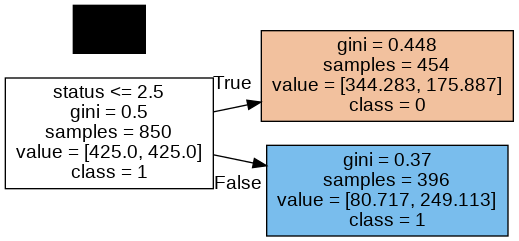

In [110]:
mod_DTG = modelof_DT.fit(X_train, np.ravel(y_train))
dot_data = tree.export_graphviz(decision_tree=mod_DTG, 
                                out_file=None,
                                max_depth=None,
                                 feature_names=['status',
                                             'duration',
                                             'credit_history',
                                             'purpose',
                                             'amount',
                                             'savings',
                                             'employment_duration',
                                             'installment_rate',
                                             'personal_status_sex',
                                             'other_debtors',
                                             'present_residence',
                                             'property',
                                             'age',
                                             'other_installment_plans',
                                             'housing',
                                             'number_credits',
                                             'job',
                                             'people_liable',
                                             'telephone',
                                             'foreign_worker'],
                                class_names=['0','1'], 
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Referencias
> Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Van Duuren Media.

> Shaikh, R. (2018b, noviembre 9). Choosing the right Encoding method-Label vs OneHot Encoder. Medium. Recuperado 22 de octubre de 2022, de https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b

> Saxena, S. (2021, 8 abril). Precision vs Recall - shruti saxena. Medium. Recuperado 22 de octubre de 2022, de https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488

> Sharma, A. (2022, 15 junio). Decision Tree vs. Random Forest – Which Algorithm Should you Use? Analytics Vidhya. Recuperado 23 de octubre de 2022, de https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/


###**Fin de la Actividad de la semana 6.**